In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [2]:
def showStock(c):
    df = pd.read_csv(c+".csv", parse_dates=['Date'])
    time = df['Date']
    val = df['Close']
    df = df[['Date','Close']]
    df = df.set_index('Date')
    #df = df.sort_index(inplace=True)
    rollmean = val.rolling(window=15).mean()
    plt.figure(figsize=(20, 10))
    plt.plot(time,val)
    plt.plot(time,rollmean)
    plt.title('Stock Price: '+c, fontsize=30)
    plt.ylabel('Value in USD', fontsize=15)
    plt.xlabel('Time in years', fontsize=15)
    plt.legend(['Original','Rolling Mean'], fontsize=15)
    plt.grid()
    plt.show()
    return df,rollmean

def addDecomp(c,size):
    decomposition = sm.tsa.seasonal_decompose(c.tail(size), model='multiplicative', period=12, extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_figwidth(20)
    fig.set_figheight(20)
    fig.suptitle('Multiplicative Time Series', fontsize=20)
    plt.show()
    return decomposition

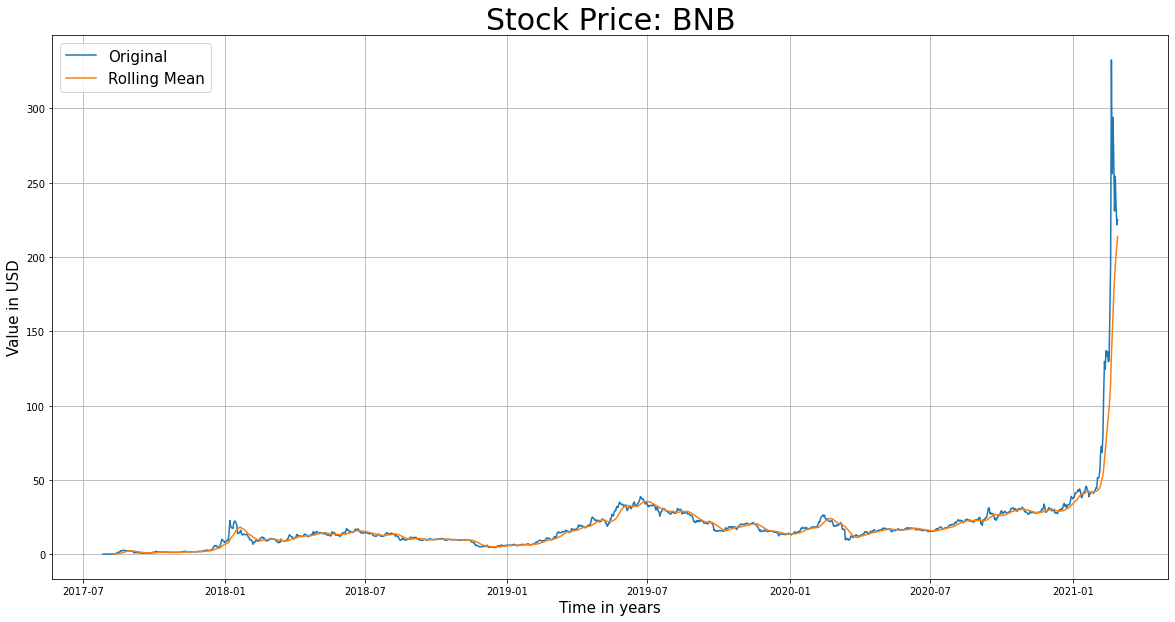

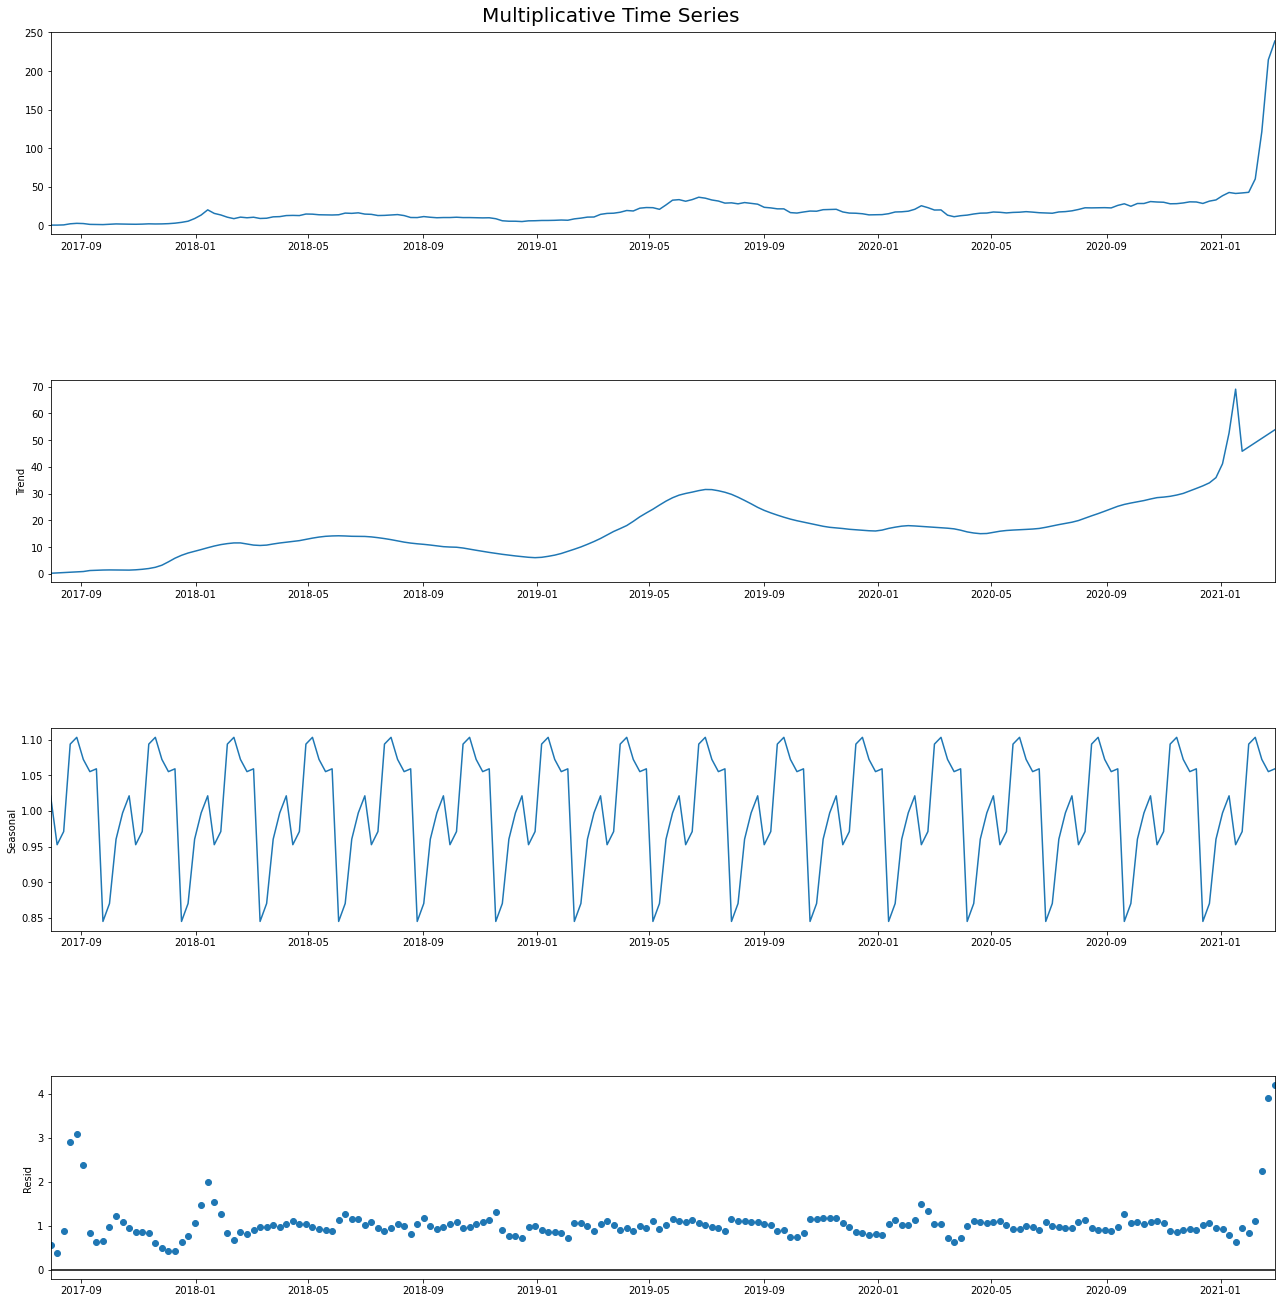

In [3]:
c1,rm1 = showStock('BNB')
c1 = c1.resample('W').mean()
d1 = addDecomp(c1,c1.size)

In [4]:
treand = d1.trend

In [5]:
seasonal = d1.seasonal

In [6]:
resid = d1.resid

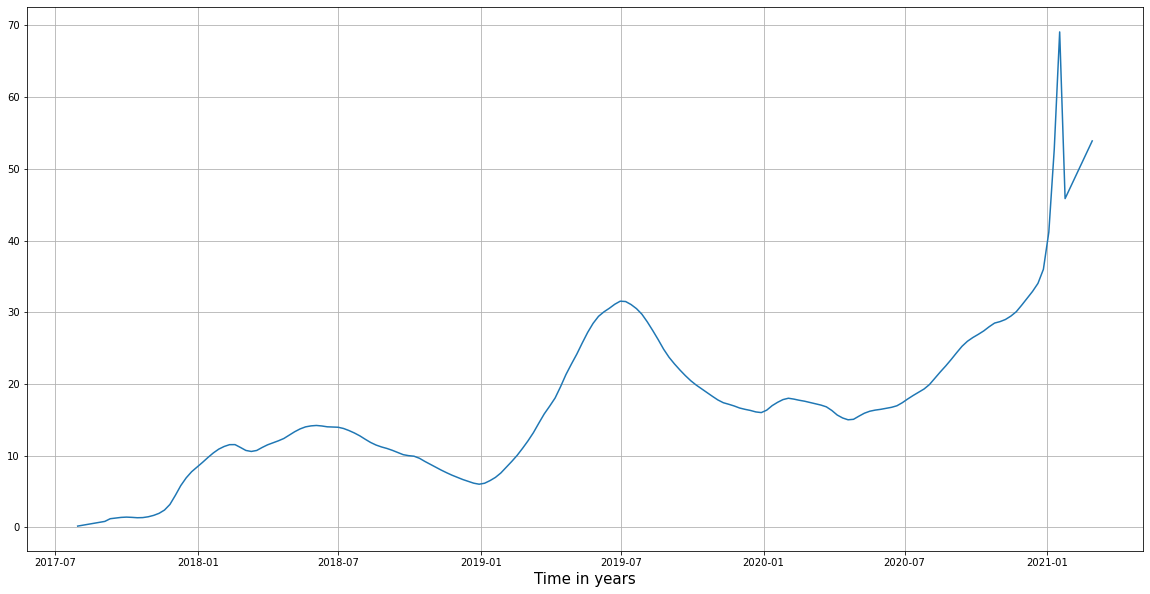

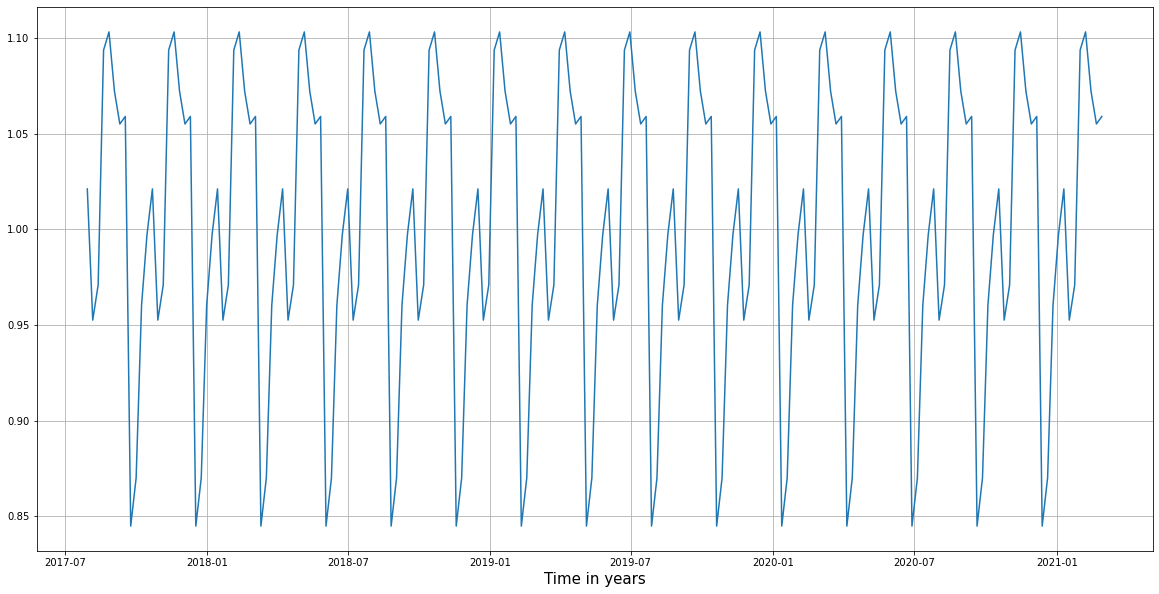

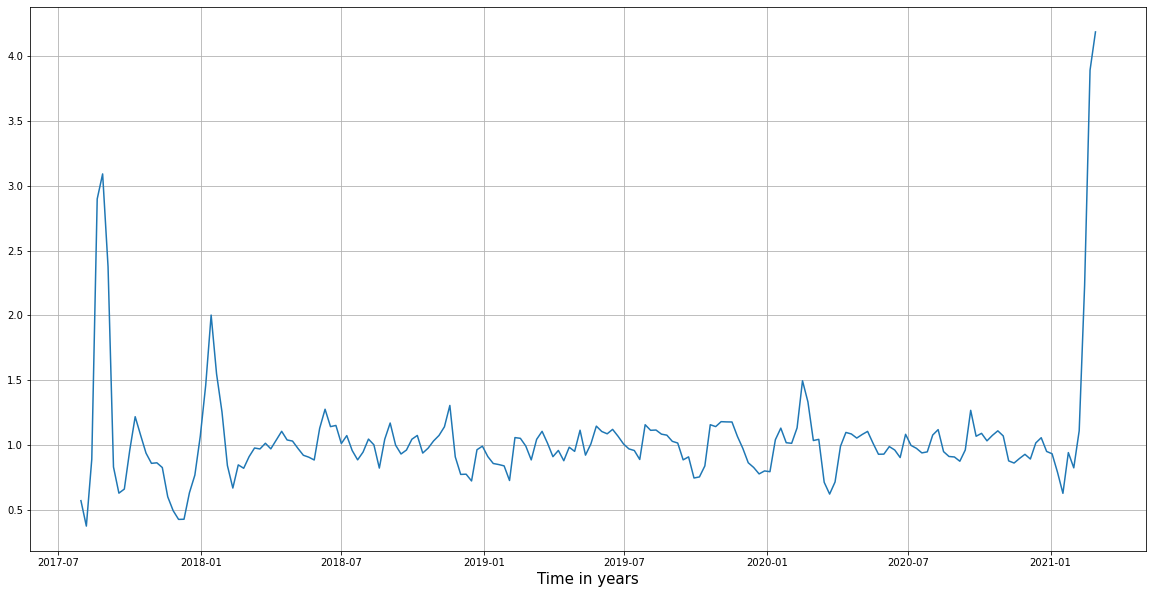

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(treand)
plt.xlabel('Time in years', fontsize=15)
plt.grid()
plt.show()
plt.figure(figsize=(20, 10))
plt.plot(seasonal)
plt.xlabel('Time in years', fontsize=15)
plt.grid()
plt.show()
plt.figure(figsize=(20, 10))
plt.plot(resid)
plt.xlabel('Time in years', fontsize=15)
plt.grid()
plt.show()

In [8]:
def brownian(s,t,n):
    np.random.seed(s)
    x = np.linspace(0,t,num=int(t*n))
    w = np.zeros(int(t*n))
    for i in range(1,int(t*n)):
        w[i] = w[i-1] + np.random.normal()/np.sqrt(n)
    return x,w

def geoBrownStock(s0,mu,sigma,t,n,seed,show):
    s = np.zeros(int(t*n))
    x,w = brownian(seed,t,n)
    for i in range(int(t*n)):
        s[i] = s0*math.exp((mu-sigma*sigma/2.00)*x[i] + (sigma*w[i]) ) 
    if (show == True):
        plt.plot(x,s)
        plt.title('Stock Price using Geometric Brownian Motion', fontsize=30)
        plt.ylabel('S', fontsize=15)
        plt.xlabel('Time', fontsize=15)
        plt.legend(['Original','Predicted'])
        plt.grid()
        plt.show()
    return w,s

def show(df1,t,n,reverse):
    #print(t*n)
    df1 = np.array(df1)
    if reverse == True:
        df1 = df1[::-1]
    plt.figure(figsize=(15, 6))
    plt.plot(np.linspace(0,t,num=round(t*n)),df1)

def musigma(df1):
    df2 = np.zeros(df1.size-1)
    summ = 0
    for i in range(df1.size-1):
        df2[i] = (df1[i+1]-df1[i])/df1[i]
    mu = df2.mean()*math.sqrt(365.00)
    df3 = np.zeros(df1.size-1)
    for i in range(1,df3.size+1):
        df3[i-1] = np.log(df1[i]/df1[i-1])
    mean = df3.mean()
    s = 0;
    for i in range(df3.size):
        s = s + (df3[i] - mean)*(df3[i] - mean)
    s = s / (df3.size - 1)
    s = math.sqrt(s)
    sigma = s / math.sqrt(1/365.00)
    print("Predicted Mean: "+str(mu))
    print("Predicted Sigma: "+str(sigma))
    return mu,sigma

def predictModel(df1,mu,sigma,seed):
    df1 = np.array(df1)
    #df1 = df1[::-1]
    s0 = df1[0]
    w,stock = geoBrownStock(s0,mu,sigma,df1.size/365.00,365.00,seed,True)
    return stock


Predicted Mean: 0.8044777872150239
Predicted Sigma: 2.35408326014372


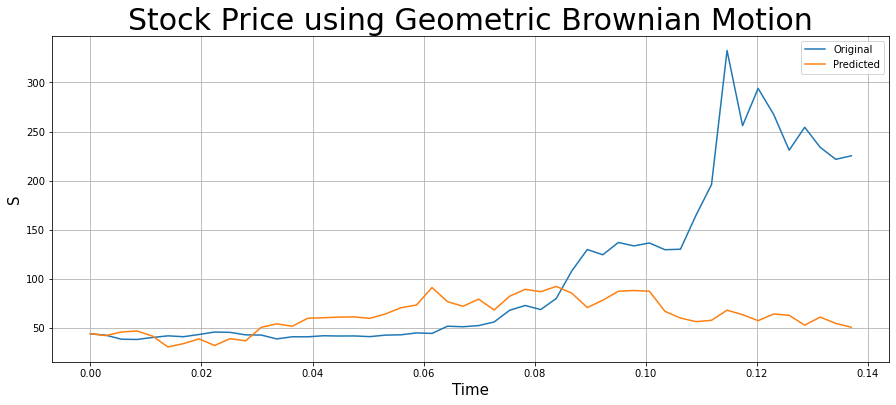

Predicted Mean: 0.21315286735473124
Predicted Sigma: 2.4822560061711685


(0.21315286735473124, 2.4822560061711685)

In [16]:
df = pd.read_csv('BNB.csv')
df1 = df['Close'].tail(50).reset_index(drop=True)
show(df1,df1.size/365.00,365.00,False)
mu,sigma = musigma(df1)
stock = predictModel(df1,mu,sigma,6)
musigma(stock)

Predicted Mean: 0.08093954668975577
Predicted Sigma: 1.0318368224061318


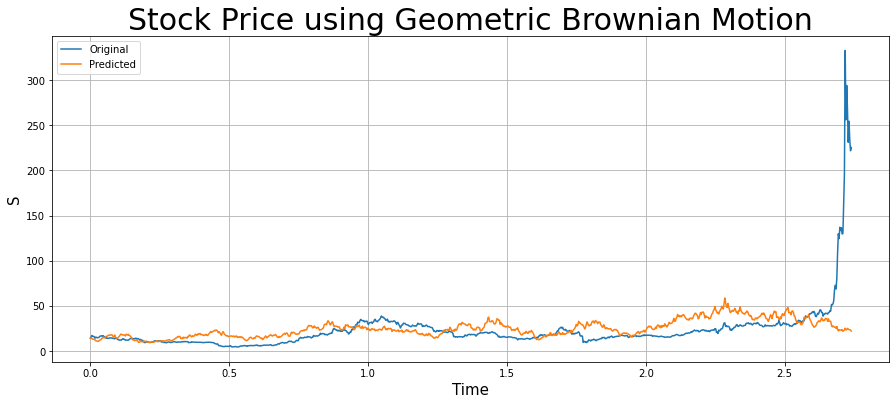

Predicted Mean: 0.03734988099750766
Predicted Sigma: 1.052731756776504


(0.03734988099750766, 1.052731756776504)

In [17]:
df = pd.read_csv('BNB.csv')
df1 = df['Close'].tail(1000).reset_index(drop=True)
show(df1,df1.size/365.00,365.00,False)
mu,sigma = musigma(df1)
stock = predictModel(df1,mu,sigma,9)
musigma(stock)

c:\users\geeksa67\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


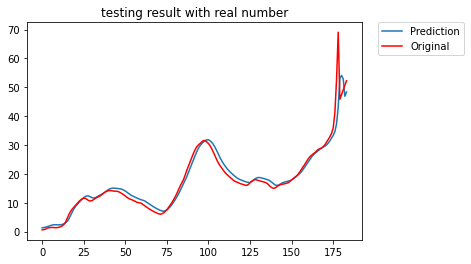

c:\users\geeksa67\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


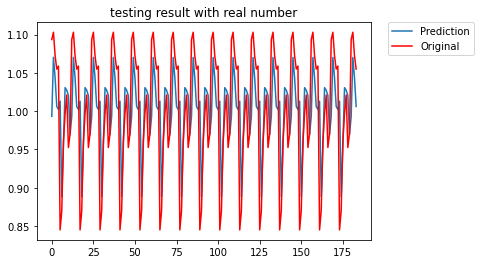

c:\users\geeksa67\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


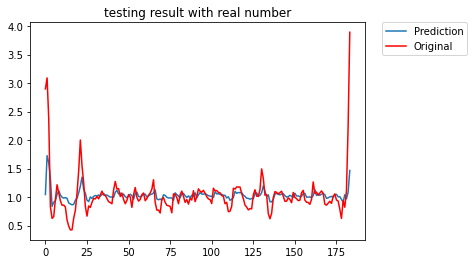

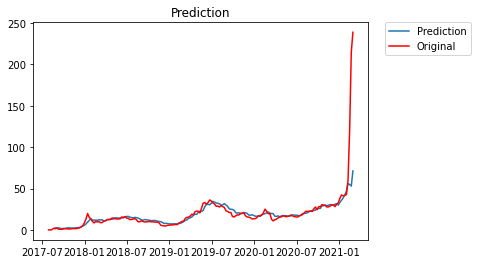

In [20]:
from sklearn.preprocessing import MinMaxScaler
def model(treand):
    scaler = MinMaxScaler()
    treand_s = scaler.fit_transform(treand.values.reshape(-1,1))
    def create_dataset(dataset, look_back=3):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back)]
            dataX.append(a)
            dataY.append(dataset[i + look_back])
        return np.array(dataX), np.array(dataY)
    x, y = create_dataset(treand_s)
    x = x.reshape(x.shape[0], x.shape[1])
    x_train = x[0:len(x)]
    y_train = y[0:len(x)]
    from sklearn.neural_network import MLPRegressor
    clf = MLPRegressor(activation = 'tanh',solver='adam')
    clf.fit(x_train,y_train)
    train_pred = clf.predict(x_train)
    plt.plot(scaler.inverse_transform(train_pred.reshape(-1,1)),label='Prediction')
    plt.plot(scaler.inverse_transform(y_train.reshape(-1,1)),color='red', label='Original')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('testing result with real number')
    plt.show()
    return scaler.inverse_transform(train_pred.reshape(-1,1))
t1 = model(treand)
t2 = model(seasonal)
t3 = model(resid)
pred = t1*t2*t3
pred = pd.DataFrame(pred,index=d1.observed.index.to_series().tail(184))
plt.plot(pred,label='Prediction')
plt.plot(d1.observed,color='red', label='Original')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Prediction')
plt.show()